# Importing

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [59]:
sns.set_palette('Set2')

# Getting the data

In [2]:
pwd

'C:\\Users\\zaidr\\$ML_PATH\\StudentMentalHealth Dateset'

In [3]:
df = pd.read_csv('C:\\Users\\zaidr\\$ML_PATH\\StudentMentalHealth Dateset\\Student Mental health.csv')

# EDA

In [4]:
df.head()

,Timestamp,Choose your gender,Age,What is your course?,Your current year of Study,What is your CGPA?,Marital status,Do you have Depression?,Do you have Anxiety?,Do you have Panic attack?,Did you seek any specialist for a treatment?
0,8/7/2020 12:02,Female,18.0,Engineering,year 1,3.00 - 3.49,No,Yes,No,Yes,No
1,8/7/2020 12:04,Male,21.0,Islamic education,year 2,3.00 - 3.49,No,No,Yes,No,No
2,8/7/2020 12:05,Male,19.0,BIT,Year 1,3.00 - 3.49,No,Yes,Yes,Yes,No
3,8/7/2020 12:06,Female,22.0,Laws,year 3,3.00 - 3.49,Yes,Yes,No,No,No
4,8/7/2020 12:13,Male,23.0,Mathemathics,year 4,3.00 - 3.49,No,No,No,No,No


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 11 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Timestamp                                     101 non-null    object 
 1   Choose your gender                            101 non-null    object 
 2   Age                                           100 non-null    float64
 3   What is your course?                          101 non-null    object 
 4   Your current year of Study                    101 non-null    object 
 5   What is your CGPA?                            101 non-null    object 
 6   Marital status                                101 non-null    object 
 7   Do you have Depression?                       101 non-null    object 
 8   Do you have Anxiety?                          101 non-null    object 
 9   Do you have Panic attack?                     101 non-null    obj

In [7]:
df.describe()

,Age
count,100.00000
mean,20.53000
std,2.49628
min,18.00000
25%,18.00000
50%,19.00000
75%,23.00000
max,24.00000


#### I am going to drop the Timestamp colmn because we are not intersted discovering the effect of time to the other columns

In [7]:
df.drop("Timestamp", 1, inplace=True)

C:\Users\zaidr\AppData\Local\Temp/ipykernel_1868/512847233.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df.drop("Timestamp", 1, inplace=True)


In [8]:
palette_color = sns.color_palette('bright')

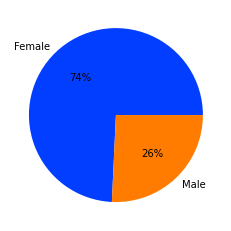

In [60]:
plt.pie(df["Choose your gender"].value_counts(), labels=df["Choose your gender"].value_counts().index, colors=palette_color,
       autopct="%0.f%%")
pass

#### It is imbalanced feature, so we have to keep it mind when comparing between genders.

In [115]:
cols = ['Do you have Depression?', 'Do you have Anxiety?', 
          'Do you have Panic attack?', 'Did you seek any specialist for a treatment?']

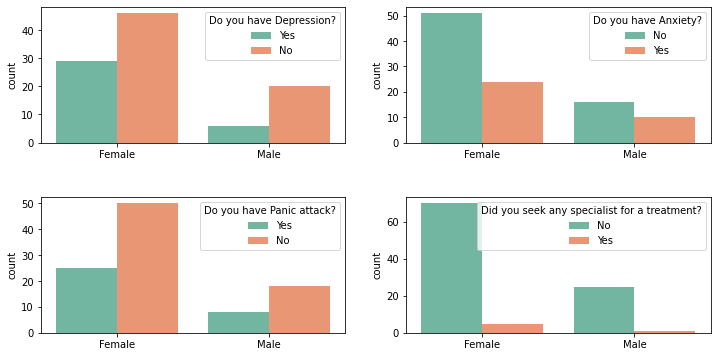

In [116]:
x=1
plt.figure(figsize=(12,6))
for i in cols:
    plt.subplot(2,2,x)
    plt.title("")
    sns.countplot(data=df, x="Choose your gender", hue=i)
    plt.xlabel(None)
    x+=1
    plt.subplots_adjust(hspace=0.4)


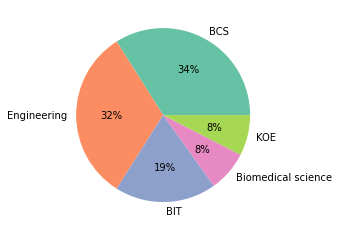

In [62]:
plt.pie(x=df['What is your course?'].value_counts().iloc[0:5], labels=df['What is your course?'].value_counts().iloc[0:5].index,autopct='%0.f%%')
pass

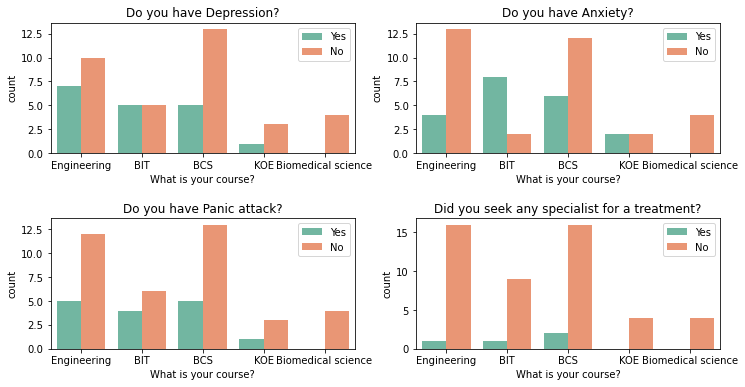

In [117]:
x=1
e = df["What is your course?"].value_counts().iloc[0:5].index
df_plot = df["What is your course?"].where(df["What is your course?"].apply(lambda x: x in e)).dropna()
plt.figure(figsize=(12,6))
for i in cols:
    plt.subplot(2,2,x)
    sns.countplot( x=df_plot, hue = df[i].iloc[df_plot.index], hue_order=["Yes", 'No'])
    plt.legend(loc="upper right", labels=["Yes", "No"])
    plt.title(i)
    x+=1
    plt.subplots_adjust(hspace=0.5)



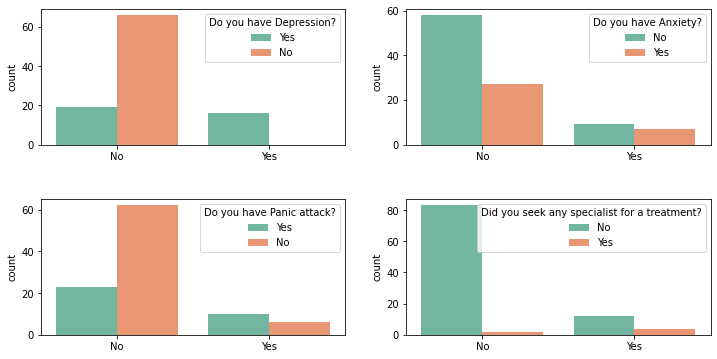

In [118]:
x=1
plt.figure(figsize=(12,6))
for i in cols:
    plt.subplot(2,2,x)
    plt.title("")
    sns.countplot(data=df, x="Marital status", hue=i)
    plt.xlabel(None)
    x+=1
    plt.subplots_adjust(hspace=0.4)


In [65]:
df['Your current year of Study'] = df['Your current year of Study'].str.lower()

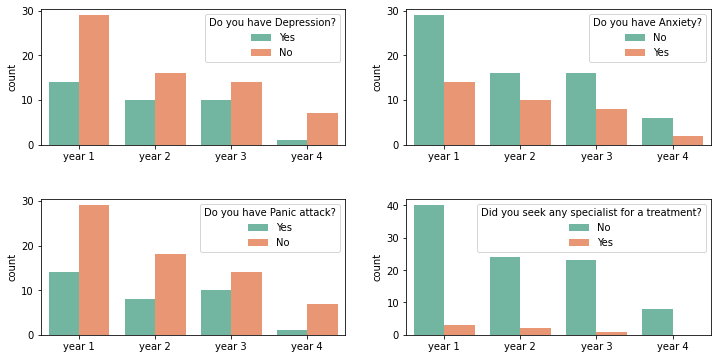

In [119]:
x=1
plt.figure(figsize=(12,6))
for i in cols:
    plt.subplot(2,2,x)
    plt.title("")
    sns.countplot(data=df, x="Your current year of Study", hue=i, palette='Set2')
    plt.xlabel(None)
    x+=1
    plt.subplots_adjust(hspace=0.4)


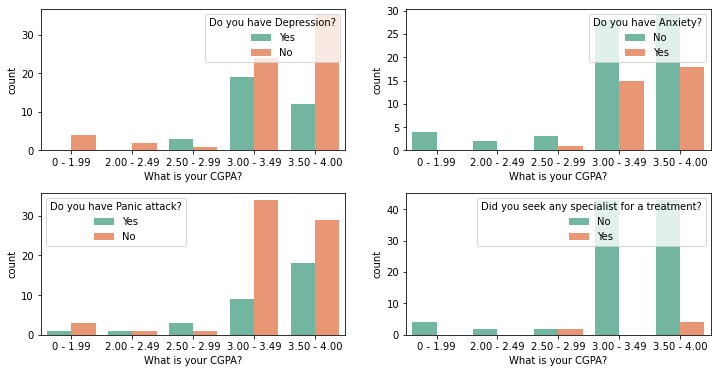

In [120]:
x=1
plt.figure(figsize=(12,6))
for i in cols:
    plt.subplot(2,2,x)
    plt.title("")
    sns.countplot(data=df, x="What is your CGPA?", hue=i, order=['0 - 1.99', '2.00 - 2.49', '2.50 - 2.99', '3.00 - 3.49',
                                                               '3.50 - 4.00'])
    x+=1
    plt.subplots_adjust(hspace=0.3)


In [91]:
df['Age'].isnull().sum()

1

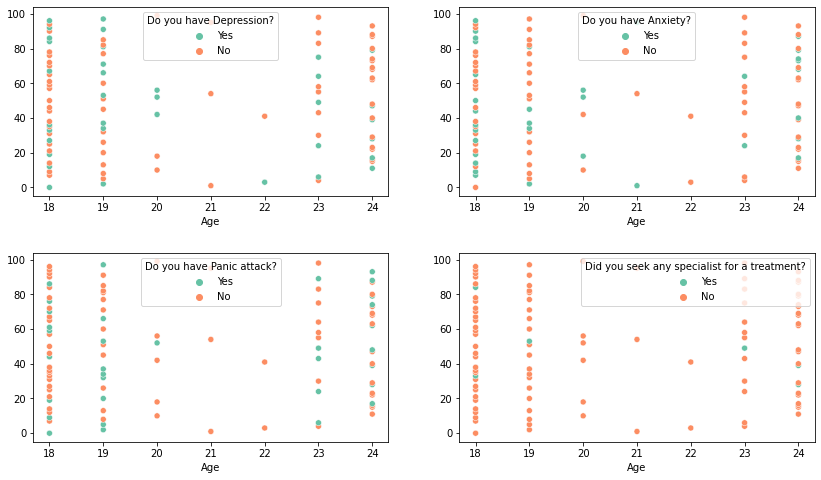

In [121]:
x=1
df_age = df.dropna()
plt.figure(figsize=(14,8))
for i in cols:
    plt.subplot(2,2,x)
    plt.title("")
    sns.scatterplot(data = df_age,  x= "Age", y=np.arange(0,100), hue = i, hue_order=['Yes', 'No'])    
    x+=1
    plt.subplots_adjust(hspace=0.3)
